# 시게열 데이터 분석


## 자기상관 (Autocorrelation) - AR

자기상관이란 어떠한 Random Variable에 대해서 이전의 값이 이후에 값에 영향을 미치고 있는 상황

## 이동평균 (Moving Average) - MA

이동평균법은 전체 데이터 집합의 여러 하위집합에 대한 일련의 평균을 만들어 데이터 요소를 분석하는 단계

시간이 지날수록 어떠한 Random Variable의 평균값이 지속적으로 증가하거나 감소하는 경향이 생길 수 있다.

## ARMA (Autogregressive Moving Average)

AR모형과 MA모델을 합친 것.
과거의 관측값과 오차를 사용해서 현재의 시계열 값을 설명하는 모델.

## ARIMA (Autoregressive Integrated Moving Average)

시계열 데이터 기반 분석기법으로 과거지식이나 경험을 바탕으로 한 행동에 따라 경제가 움직이고 있음을 기초로 한다.

ARMA모델을 일반화 한것으로,  분기/반기/연간 단위로 다음 지표를 예측한다거나 주간/월간 단위로 지표를 리뷰하며 트렌드에 이상치가 없는지를 모니터링 하는 데 사용되는 분석 기법

In [ ]:
참고문헌 : 
- AR, MA : https://m.blog.naver.com/bluefish850/220749045909

> pip install pmdarima

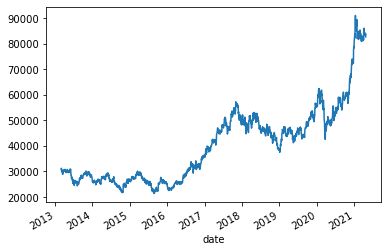

In [74]:
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima


df = pd.read_json("example00593.json", orient='series')
df.set_index('date', inplace=True, drop=True)

stock_data = df['close'][4000:]
flg = stock_data.plot()

In [75]:
from sklearn.model_selection  import train_test_split
stock_data_train, stock_data_test = train_test_split(stock_data, test_size=0.05, shuffle=False)

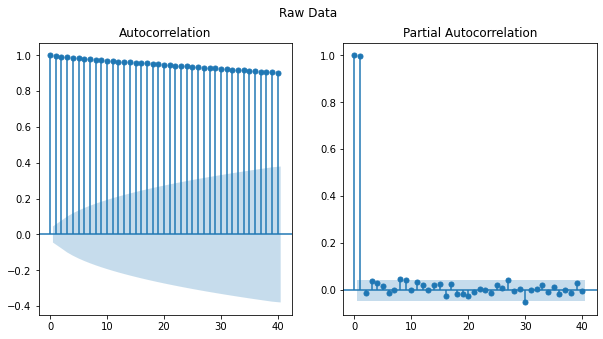

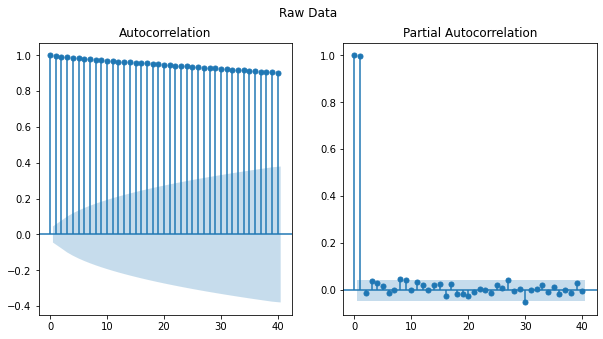

In [76]:
flg, ax = plt.subplots(1,2,figsize=(10,5))
flg.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(stock_data_train.values.squeeze(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(stock_data_train.values.squeeze(), lags=40, ax=ax[1])

In [77]:
diff_stock_data_train = stock_data_train.copy()
diff_stock_data_train = diff_stock_data_train.diff()
diff_stock_data_train = diff_stock_data_train.dropna()
print(stock_data_train)

print(diff_stock_data_train)

date
2013-03-05    31000
2013-03-06    31200
2013-03-07    30400
2013-03-08    29980
2013-03-11    30160
              ...  
2020-11-18    64800
2020-11-19    64600
2020-11-20    64700
2020-11-23    67500
2020-11-24    67700
Name: close, Length: 1900, dtype: int64
date
2013-03-06     200.0
2013-03-07    -800.0
2013-03-08    -420.0
2013-03-11     180.0
2013-03-12    -280.0
               ...  
2020-11-18    -900.0
2020-11-19    -200.0
2020-11-20     100.0
2020-11-23    2800.0
2020-11-24     200.0
Name: close, Length: 1899, dtype: float64


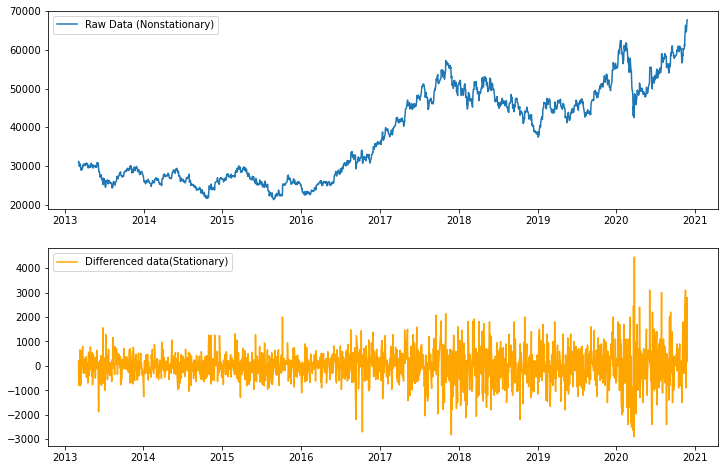

In [78]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(stock_data_train)
plt.legend(['Raw Data (Nonstationary)'])
plt.subplot(212)
plt.plot(diff_stock_data_train, 'orange')
plt.legend(['Differenced data(Stationary)'])
plt.show()

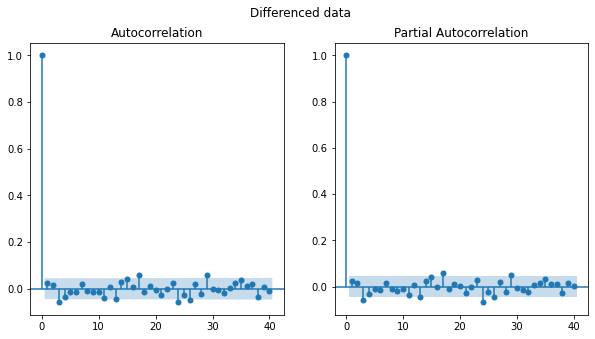

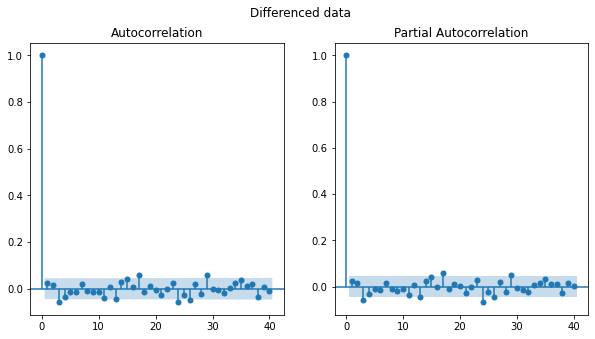

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Differenced data')
sm.graphics.tsa.plot_acf(diff_stock_data_train.values.squeeze(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_stock_data_train.values.squeeze(), lags=40, ax=ax[1])


In [80]:
auto_arima_model = auto_arima(stock_data_train, start_p=1, start_q=1,
                             max_p=3, max_q=3, seasonal=False,
                             d=1,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=30107.832, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30108.481, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=30110.262, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=30106.005, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=30108.458, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=30110.457, Time=0.68 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=30112.566, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=30106.805, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=30110.370, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=30111.326, Time=0.71 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=30106.445, Time=1.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=30108.517, Time=0.81 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=30105.714, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=30106.295, Time=0.46 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=30108.219, Time=0.47

In [81]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1900
Model:               SARIMAX(3, 1, 0)   Log Likelihood              -15047.857
Date:                Wed, 12 May 2021   AIC                          30105.714
Time:                        00:04:19   BIC                          30133.460
Sample:                             0   HQIC                         30115.928
                               - 1900                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.0788     15.494      1.296      0.195     -10.288      50.446
ar.L1          0.0263      0.016      1.631      0.103      -0.005       0.058
ar.L2          0.0081      0.017      0.488      0.626      -0.024       0.041
ar.L3         -0.0564      0.017     -3.275      0.001      -0.090      -0.023
sigma2      4.472e+05   9430.862     47.422      0.000    4.29e+05    4.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               806.25
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               4.37   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
prediction = auto_arima_model.predict(len(stock_data_test), return_conf_lnt=True)

predicted_value = prediction
# predicted_ub = prediction[: 0]
# predicted_lb = prediction[: 1]
predict_index = list(stock_data_test.index)
predict_index[0]

Timestamp('2020-11-25 00:00:00')

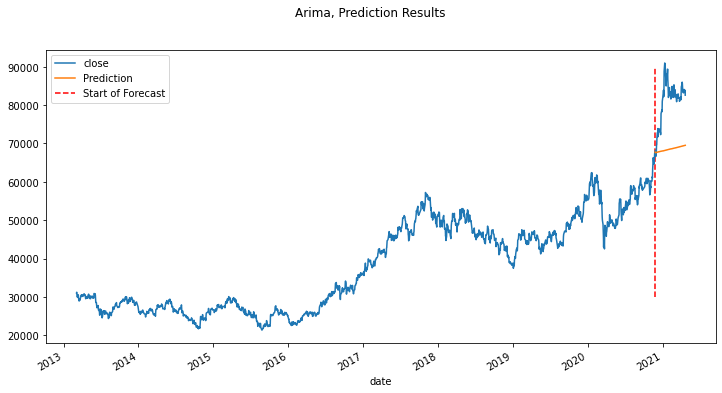

In [85]:
fig,ax = plt.subplots(figsize=(12,6))
stock_data.plot(ax=ax)
ax.vlines('2020-11-25', 30000, 90000, linestyle='--', color='r', label='Start of Forecast')
ax.plot(predict_index, predicted_value, label='Prediction')
# ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')

ax.legend(loc='upper left')
plt.suptitle('Arima, Prediction Results')
plt.show()

In [ ]:
참고문헌 : 
- ARIMA 모델 python 실습 : https://www.youtube.com/watch?v=rdR2fNDq6v0
- pmdarima: http://alkaline-ml.com/pmdarima/index.html

## 실습2

In [191]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df = pd.read_json("example00593.json", orient='series')
df = df.loc[df['date'] > "2020-01-01"]
df.head(5)

,date,open,high,low,close,volume
5677,2020-01-02,55500,56000,55000,55200,12993228
5678,2020-01-03,56000,56600,54900,55500,15422255
5679,2020-01-06,54900,55600,54600,55500,10278951
5680,2020-01-07,55700,56400,55600,55800,10009778
5681,2020-01-08,56200,57400,55900,56800,23501171


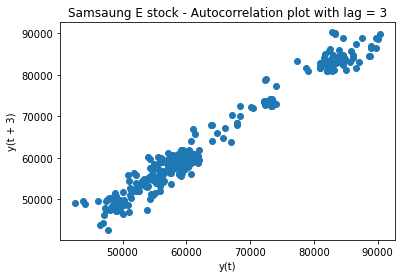

In [192]:
plt.figure()
lag_plot(df['open'], lag=3)
plt.title('Samsaung E stock - Autocorrelation plot with lag = 3')
plt.show()

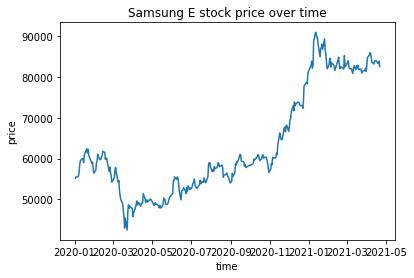

In [193]:
plt.plot(df["date"], df["close"])
# plt.xticks(np.arange(50000,100000, 10000), df['date'][0:323:30])
plt.title("Samsung E stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [194]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
training_data = train_data['close'].values
test_data = test_data['close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

/Users/henry/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  if invalid_ar:
/Users/henry/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  if invalid_ma:


Testing Mean Squared Error is 1579499.0001788037


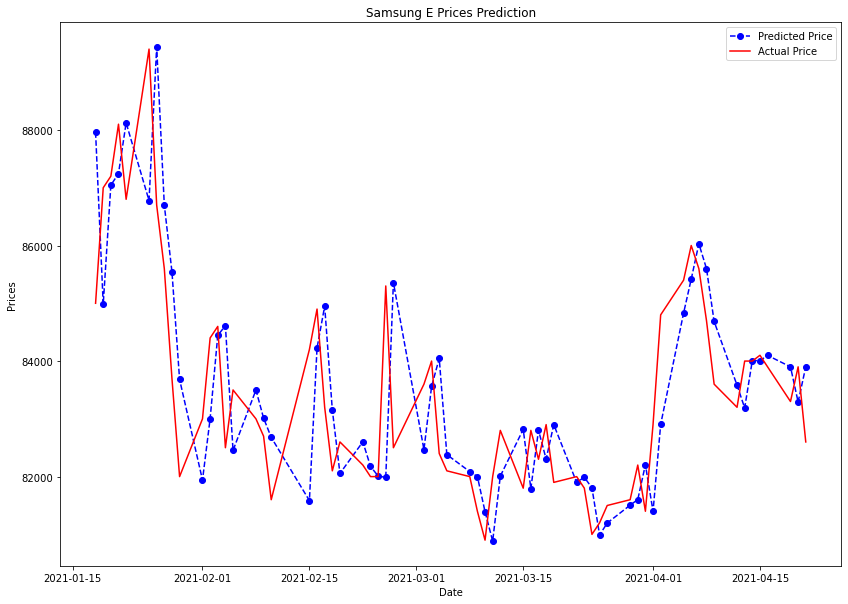

In [196]:
df.set_index('date', inplace=True)
test_set_range = df[int(len(df)*0.8):].index
plt.figure(figsize=(14, 10))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Samsung E Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

참고문헌 : https://ai.plainenglish.io/time-series-forecasting-predicting-stock-prices-using-an-arima-model-fa5b46054715

## 실습3

In [214]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df = pd.read_json("example00593.json", orient='series')
df.head(5)

,date,open,high,low,close,volume
0,1997-04-25,1058,1058,1036,1041,77790
1,1997-04-26,1042,1084,1040,1085,81190
2,1997-04-28,1102,1102,1084,1094,95340
3,1997-04-29,1093,1093,1074,1087,131070
4,1997-04-30,1083,1086,1067,1078,131410


In [215]:
# Set target series
series = df['close']
# Create train data set
train_split_date = '2014-12-30'
train_split_index = np.where(df.date == train_split_date)[0][0]
x_train = df.loc[df['date'] <= train_split_date]['close']
# Create test data set
test_split_date = '2019-01-02'
test_split_index = np.where(df.date == test_split_date)[0][0]
x_test = df.loc[df['date'] >= test_split_date]['close']
# Create valid data set
valid_split_index = (train_split_index.max(),test_split_index.min())
x_valid = df.loc[(df['date'] < test_split_date) & (df['date'] > train_split_date)]['close']
#printed index values are: 
#0-5521(train), 5522-6527(valid), 6528-6947(test)

In [216]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, window = 12, cutoff = 0.01):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    #Plot rolling statistics:
    fig = plt.figure(figsize=(14, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        pvalue = dftest[1]
        if pvalue < cutoff:
            print('p-value = %.4f. The series is likely stationary.' % pvalue)
        else:
            print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
            print(dfoutput)

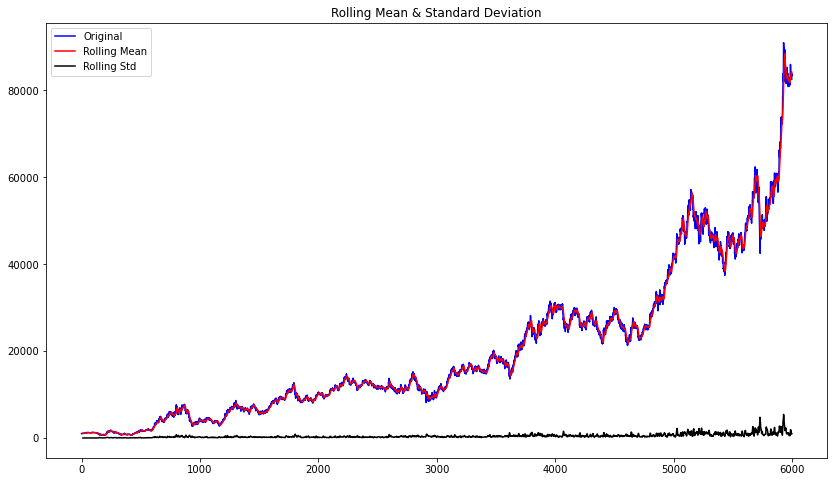

Results of Dickey-Fuller Test:
p-value = 0.9985. The series is likely non-stationary.
Test Statistic                    1.860075
p-value                           0.998461
#Lags Used                       18.000000
Number of Observations Used    5981.000000
Critical Value (1%)              -3.431444
dtype: float64
p-value = 0.9985. The series is likely non-stationary.
Test Statistic                    1.860075
p-value                           0.998461
#Lags Used                       18.000000
Number of Observations Used    5981.000000
Critical Value (1%)              -3.431444
Critical Value (5%)              -2.862023
dtype: float64
p-value = 0.9985. The series is likely non-stationary.
Test Statistic                    1.860075
p-value                           0.998461
#Lags Used                       18.000000
Number of Observations Used    5981.000000
Critical Value (1%)              -3.431444
Critical Value (5%)              -2.862023
Critical Value (10%)             -2.567027


In [217]:
test_stationarity(series)
